___
# Library import

In [1]:
import pandas as pd
import utils

___
# Data exploration

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
# 자료확인
print(df.columns)
df.tail()

Index(['loan_amnt', 'int_rate', 'grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'revol_bal', 'total_acc', 'loan_status'],
      dtype='object')


loan_amnt  int_rate  grade  emp_title  emp_length  home_ownership  \
218706      15000     18.49      5          1           9               1   
218707      20000      6.24      1          1          10               4   
218708      31050     21.99      6          1          10               1   
218709       9000      9.17      2          1           1               1   
218710       8000     12.59      3          1           4               3   

        annual_inc  verification_status  issue_d  purpose    dti  delinq_2yrs  \
218706     90000.0                    0       12        3  25.13            1   
218707    125000.0                    1       12        2  14.20            1   
218708    875000.0                    1       12        3   9.66            1   
218709     80000.0                    1       12        3   3.97            1   
218710     45000.0                    1       12        3  26.21            0   

        inq_last_6mths  pub_rec  revol_bal  total_acc  loan_status  
218706               0        0       4104         21            1  
218707               0        0      23880         30            1  
218708               0        0      25770         13            1  
218709               0        0       6320         17            1  
218710               0        0       9097         47            1

___
# Check baseline

In [4]:
base_lr = utils.get_logistic(df)

Accuracy: 77.88%


___
# Data Preprocessing

### Heatmap(correlation analysis)
- 서로 상관성이 높은 변수 확인

In [5]:
utils.heatmap_display(df)

#### 상관성이 높은 변수 'int_rate', 'grade'
- 신용등급과 이자율 중 신용등급 제거

In [6]:
del df['grade']

In [7]:
df.tail()

loan_amnt  int_rate  emp_title  emp_length  home_ownership  \
218706      15000     18.49          1           9               1   
218707      20000      6.24          1          10               4   
218708      31050     21.99          1          10               1   
218709       9000      9.17          1           1               1   
218710       8000     12.59          1           4               3   

        annual_inc  verification_status  issue_d  purpose    dti  delinq_2yrs  \
218706     90000.0                    0       12        3  25.13            1   
218707    125000.0                    1       12        2  14.20            1   
218708    875000.0                    1       12        3   9.66            1   
218709     80000.0                    1       12        3   3.97            1   
218710     45000.0                    1       12        3  26.21            0   

        inq_last_6mths  pub_rec  revol_bal  total_acc  loan_status  
218706               0        0       4104         21            1  
218707               0        0      23880         30            1  
218708               0        0      25770         13            1  
218709               0        0       6320         17            1  
218710               0        0       9097         47            1

### Histogram
- 자료의 대략적인 분포 확인

In [8]:
# 범주형 자료 히스토그램
utils.hist_display(df, 'categorical')

In [9]:
# 연속형 자료 히스토그램
utils.hist_display(df, 'continuous')

- 연간소득(annual_inc)과 리볼빙 잔고(revol_bal)에 이상치(outlier) 발견

### Q-Q plot
- 결과 안정성 향상을 위한 자료의 정규성 확인

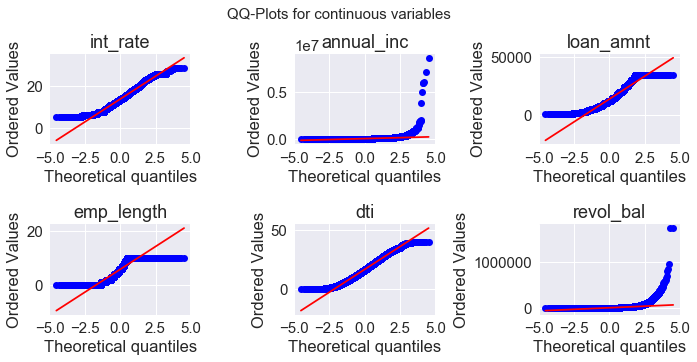

In [10]:
# 연속형 자료 Q-Q plot
utils.qq_display(df)

### Remove outlier

In [11]:
cleaned_df = utils.remove_outlier(df, 'continuous', 0.001)

The number of outliers(0.1%): 2893


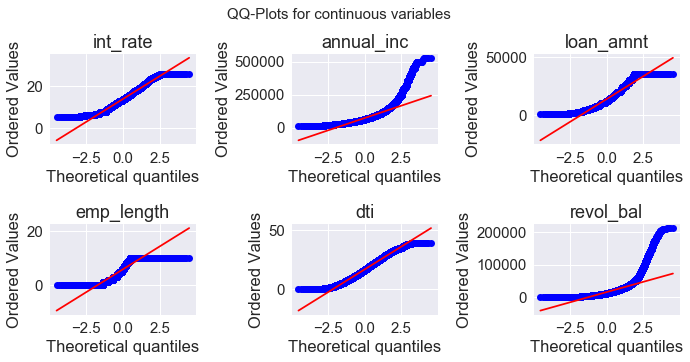

In [12]:
utils.qq_display(cleaned_df)

### Feature scaling
- 각 변수의 단위 조정

In [13]:
df.tail()

loan_amnt  int_rate  emp_title  emp_length  home_ownership  \
218706      15000     18.49          1           9               1   
218707      20000      6.24          1          10               4   
218708      31050     21.99          1          10               1   
218709       9000      9.17          1           1               1   
218710       8000     12.59          1           4               3   

        annual_inc  verification_status  issue_d  purpose    dti  delinq_2yrs  \
218706     90000.0                    0       12        3  25.13            1   
218707    125000.0                    1       12        2  14.20            1   
218708    875000.0                    1       12        3   9.66            1   
218709     80000.0                    1       12        3   3.97            1   
218710     45000.0                    1       12        3  26.21            0   

        inq_last_6mths  pub_rec  revol_bal  total_acc  loan_status  
218706               0        0       4104         21            1  
218707               0        0      23880         30            1  
218708               0        0      25770         13            1  
218709               0        0       6320         17            1  
218710               0        0       9097         47            1

In [14]:
scaled_df = utils.var_scaler(cleaned_df, feature_range=(0, 10))
scaled_df.tail()

loan_amnt  int_rate  emp_title  emp_length  home_ownership  \
215813   8.352941  6.027132          1        10.0               3   
215814   4.117647  6.332364          1         9.0               1   
215815   5.588235  0.397287          1        10.0               4   
215816   2.352941  1.816860          1         1.0               1   
215817   2.058824  3.473837          1         4.0               3   

        annual_inc  verification_status  issue_d  purpose       dti  \
215813    1.802326                    1       12        3  7.719253   
215814    1.511628                    0       12        3  6.425467   
215815    2.189922                    1       12        2  3.630785   
215816    1.317829                    1       12        3  1.015086   
215817    0.639535                    1       12        3  6.701611   

        delinq_2yrs  inq_last_6mths  pub_rec  revol_bal  total_acc  \
215813            0               0        0   1.313549   3.428571   
215814            1               0        0   0.192832   2.571429   
215815            1               0        0   1.122033   3.857143   
215816            1               0        0   0.296953   2.000000   
215817            0               0        0   0.427434   6.285714   

        loan_status  
215813            1  
215814            1  
215815            1  
215816            1  
215817            1

___
# Modeling and tuning

### Base performance

In [15]:
test = pd.read_csv('test_dataset.csv')
base_test = utils.get_dummy(test)

### Improved performance
- Confusion Matrix (https://en.wikipedia.org/wiki/Confusion_matrix)

In [16]:
lr = utils.get_logistic(scaled_df)

Accuracy: 77.08%


### Result analysis

In [17]:
# 기본성능
utils.plot_confusion_matrix(base_test, base_lr)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      8616
          1       0.78      1.00      0.87     29980

avg / total       0.60      0.78      0.68     38596



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
# 개선된 성능
x_test = utils.prep_data(test)
utils.plot_confusion_matrix(x_test, lr)

             precision    recall  f1-score   support

          0       0.55      0.05      0.09      8616
          1       0.78      0.99      0.87     29980

avg / total       0.73      0.78      0.70     38596



### More tuning
- Undersampling 적용

In [19]:
paid, default = df['loan_status'].value_counts()
print(paid, default)

170369 48342


In [20]:
paid/(paid+default)

0.77896859325776935

In [21]:
under_df = utils.under_sampling(scaled_df)
under_df['loan_status'].value_counts()

1    47699
0    47699
Name: loan_status, dtype: int64

Accuracy: 61.15%


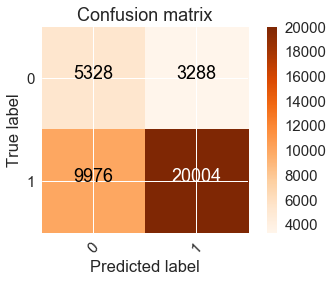

             precision    recall  f1-score   support

          0       0.35      0.62      0.45      8616
          1       0.86      0.67      0.75     29980

avg / total       0.74      0.66      0.68     38596



In [22]:
under_lr = utils.get_logistic(under_df)
utils.plot_confusion_matrix(x_test, under_lr)

### More results
- 각 독립변수(Feature)들의 계수(Coefficient)와 p값(p-value)이 가지는 의미해석

In [23]:
utils.get_summary(under_df, under_lr)

Feature Coefficient p-value
0                int_rate   -0.255158       0
1              annual_inc    0.217297       0
2               loan_amnt    -0.07142       0
3              emp_length  0.00795998       0
4                     dti   -0.118173       0
5               revol_bal   0.0160299  0.9278
6               total_acc   0.0646263       0
7             emp_title_0 -0.00965387  0.0002
8             emp_title_1    0.319837  0.6289
9        home_ownership_1    0.230182       0
10       home_ownership_2  -0.0675943  0.6858
11       home_ownership_3    0.101891  0.0013
12       home_ownership_4   0.0457039       0
13  verification_status_0    0.199247       0
14  verification_status_1    0.110936       0
15              issue_d_1 -0.00531176  0.7441
16              issue_d_2  -0.0140681  0.1785
17              issue_d_3 -0.00162079  0.4794
18              issue_d_4  -0.0649456  0.0001
19              issue_d_5  -0.0623729  0.0001
20              issue_d_6  -0.0197516   0.061
21              issue_d_7  -0.0622578  0.0001
22              issue_d_8   0.0976196  0.0404
23              issue_d_9   0.0968072  0.0009
24             issue_d_10   0.0496861       1
25             issue_d_11   0.0935089  0.0001
26             issue_d_12     0.20289       0
27              purpose_1    0.195898       0
28              purpose_2   0.0455489       0
29              purpose_3   0.0153605       0
30              purpose_4    0.151951  0.0061
31              purpose_5  -0.0709745       0
32              purpose_6    0.179993  0.5115
33              purpose_7   0.0279961       0
34              purpose_8  -0.0797755  0.3206
35              purpose_9  -0.0881111  0.0155
36             purpose_10  -0.0651452       0
37             purpose_11  -0.0317201  0.7557
38             purpose_12   -0.454137       0
39             purpose_13   -0.091056  0.9315
40             purpose_14    0.574355       0
41          delinq_2yrs_0    0.225139       0
42          delinq_2yrs_1   0.0850436       0
43       inq_last_6mths_0    0.162508       0
44       inq_last_6mths_1    0.139209  0.0001
45       inq_last_6mths_2    0.100331       0
46       inq_last_6mths_3   0.0319412       0
47       inq_last_6mths_4   0.0888161       0
48       inq_last_6mths_5  -0.0333287       0
49       inq_last_6mths_6   -0.179293  0.0011
50              pub_rec_0    0.179754  0.0673
51              pub_rec_1    0.130429       0

# Further tasks
- 변수선택(Variable selection)
- 하이퍼모수 튜닝(Hyperparameter Tuning)